In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

# This is an exploration of the Palmer Station penguins dataset 
# https://allisonhorst.github.io/palmerpenguins/
# Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi: 10.5281/zenodo.3960218.
# https://en.wikipedia.org/wiki/Pygoscelis

# Three hundred brush-tailed penguins were briefly captured
# and subjected to humiliating beak, flipper, and weight measurements 
# so that data science students don't have to look at Ronald Fisher's 
# iris dataset.

In [2]:
# There is a mirror of this dataset in vega-datasets.
# see if I'm allowed to download it by curl...
# curl https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json
!curl -OL https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 67119  100 67119    0     0   320k      0 --:--:-- --:--:-- --:--:--  321k


In [3]:
# That line may not work for you; if not, try
import urllib.request

req = urllib.request.Request('https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json')
with urllib.request.urlopen(req) as response:
   data = response.read().decode("utf8")
data[0:300]

'[\n  {\n    "Species": "Adelie",\n    "Island": "Torgersen",\n    "Beak Length (mm)": 39.1,\n    "Beak Depth (mm)": 18.7,\n    "Flipper Length (mm)": 181,\n    "Body Mass (g)": 3750,\n    "Sex": "MALE"\n  },\n  {\n    "Species": "Adelie",\n    "Island": "Torgersen",\n    "Beak Length (mm)": 39.5,\n    "Beak Depth'

In [5]:
data_pd = pd.read_json(data)

In [6]:
# Check that the download was data and not a webpage with an error...
!head penguins.json

[
  {
    "Species": "Adelie",
    "Island": "Torgersen",
    "Beak Length (mm)": 39.1,
    "Beak Depth (mm)": 18.7,
    "Flipper Length (mm)": 181,
    "Body Mass (g)": 3750,
    "Sex": "MALE"
  },


In [7]:
penguins = pd.read_json("penguins.json")

In [8]:
penguins = pd.read_json(data)

In [9]:
g = penguins.iloc[np.random.permutation(len(penguins))]
len(penguins) * .25


86.0

In [10]:
penguins_train = g[87:]
penguins_test  = g[:87]
penguins_train.to_csv( "penguins_train.csv")
penguins_test.to_csv( "penguins_test.csv")
penguins = penguins_train
# There is a mistake in this cell that makes it not do what it 
# was intended.  

In [11]:
# Read in the two sets once they are fixed an in a file:
penguins_train=pd.read_csv( "penguins_train.csv")
penguins_test = pd.read_csv( "penguins_test.csv")
penguins = penguins_train


In [12]:
# How many penguins?
penguins.Species.value_counts(), len(penguins)

(Adelie       114
 Gentoo        94
 Chinstrap     49
 Name: Species, dtype: int64,
 257)

In [13]:
penguins.head()

,Unnamed: 0,Species,Island,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,266,Gentoo,Biscoe,45.5,13.9,210.0,4200.0,FEMALE
1,195,Chinstrap,Dream,45.5,17.0,196.0,3500.0,FEMALE
2,141,Adelie,Dream,40.6,17.2,187.0,3475.0,MALE
3,51,Adelie,Biscoe,40.1,18.9,188.0,4300.0,MALE
4,276,Gentoo,Biscoe,43.8,13.9,208.0,4300.0,FEMALE


In [14]:
penguins.describe()

,Unnamed: 0,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g)
count,257.000000,256.000000,256.000000,256.000000,256.000000
mean,172.054475,43.890234,17.085156,201.078125,4184.863281
std,100.284424,5.490057,1.938712,14.453772,804.639050
min,1.000000,32.100000,13.100000,172.000000,2700.000000
25%,85.000000,39.200000,15.575000,190.000000,3543.750000
50%,177.000000,44.100000,17.300000,196.000000,4000.000000
75%,259.000000,48.250000,18.600000,214.000000,4750.000000
max,343.000000,59.600000,21.500000,231.000000,6050.000000


In [15]:
penguins.Sex.value_counts()

FEMALE    127
MALE      121
.           1
Name: Sex, dtype: int64

In [16]:
# Dictionary for painting the dots high-contrast colors
colors = { "Adelie" : "green", "Gentoo": "blue", "Chinstrap": "red"}

Text(0, 0.5, 'Body mass (g)')

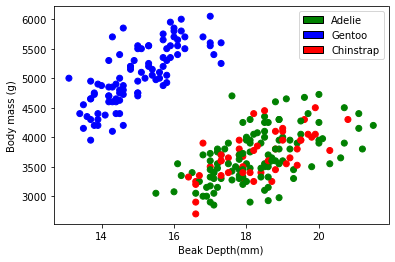

In [17]:
plt.scatter(penguins["Beak Depth (mm)"], penguins["Body Mass (g)"] , color = penguins.Species.map(colors)  )
# Had to look up how to make a legend for this kind of data
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=c[1], edgecolor='k', label=c[0]) for c in colors.items()]
plt.legend(handles=legend_elements)
plt.xlabel("Beak Depth(mm)"); plt.ylabel("Body mass (g)")

<AxesSubplot:xlabel='Beak Depth (mm)', ylabel='Body Mass (g)'>

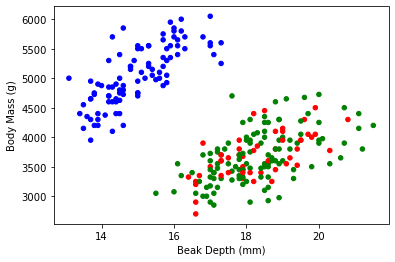

In [18]:
penguins.plot( "Beak Depth (mm)", "Body Mass (g)" ,
              kind="scatter", color = penguins.Species.map(colors)  )

In [19]:
# ONE-HOT ENCODING

penguins["SP1"] = penguins.Species == "Adelie"
penguins["SP2"] = penguins.Species == "Gentoo"
penguins["SP3"] = penguins.Species == "Chinstrap"
penguins_test["SP1"]= penguins.Species == "Adelie"
penguins_test["SP2"]= penguins.Species == "Gentoo"
penguins_test["SP3"]= penguins.Species == "Chinstrap"


In [20]:
penguins["SP1"].sum(), penguins["SP2"].sum(), penguins["SP3"].sum()

(114, 94, 49)

In [21]:
len(penguins)
115+ 95+ 47

257

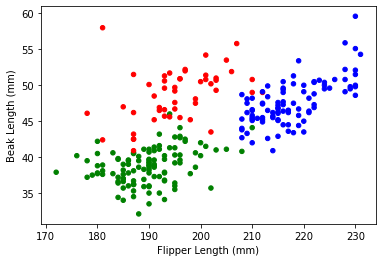

In [22]:
penguins[["Flipper Length (mm)", "Beak Length (mm)"]].plot("Flipper Length (mm)", "Beak Length (mm)", kind="scatter", color = penguins.Species.map(colors))
plt.savefig("PENGUIN.png", dpi=300, bbox_inches="tight")

In [23]:
penguins[["Beak Depth (mm)", "Body Mass (g)"]].values.shape, penguins.SP2.values[:, np.newaxis].shape

((257, 2), (257, 1))

In [24]:
# How do I get this in the right shape?
penguins.SP2.values[:, np.newaxis].shape

(257, 1)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
reg = LinearRegression().fit(penguins[["Beak Depth (mm)", "Body Mass (g)"]].values, penguins.SP2.values)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Ok, ok, I'll clean up my dataframe.. sorry, scipy..

In [27]:
penguinclean = penguins[np.isfinite( penguins["Beak Depth (mm)"]) & 
                        np.isfinite( penguins["Body Mass (g)"]) &
                        np.isfinite( penguins["Flipper Length (mm)"]) & 
                        np.isfinite( penguins["Beak Length (mm)"])]

In [28]:
penguinclean.isnull().any()

Unnamed: 0             False
Species                False
Island                 False
Beak Length (mm)       False
Beak Depth (mm)        False
Flipper Length (mm)    False
Body Mass (g)          False
Sex                     True
SP1                    False
SP2                    False
SP3                    False
dtype: bool

In [29]:
penguins_train = penguins_train[np.isfinite( penguins_train["Beak Depth (mm)"]) & 
                        np.isfinite( penguins_train["Body Mass (g)"]) &
                        np.isfinite( penguins_train["Flipper Length (mm)"]) & 
                        np.isfinite( penguins_train["Beak Length (mm)"])]

In [30]:
penguins_test = penguins_test[np.isfinite( penguins_test["Beak Depth (mm)"]) & 
                              np.isfinite( penguins_test["Body Mass (g)"]) &
                              np.isfinite( penguins_test["Flipper Length (mm)"]) & 
                              np.isfinite( penguins_test["Beak Length (mm)"])]

In [31]:
penguins_train.isnull().any(), len(penguins_test)

(Unnamed: 0             False
 Species                False
 Island                 False
 Beak Length (mm)       False
 Beak Depth (mm)        False
 Flipper Length (mm)    False
 Body Mass (g)          False
 Sex                     True
 SP1                    False
 SP2                    False
 SP3                    False
 dtype: bool,
 86)

In [32]:
penguins_test.isnull().any(), len(penguins_test)

(Unnamed: 0             False
 Species                False
 Island                 False
 Beak Length (mm)       False
 Beak Depth (mm)        False
 Flipper Length (mm)    False
 Body Mass (g)          False
 Sex                     True
 SP1                    False
 SP2                    False
 SP3                    False
 dtype: bool,
 86)

In [33]:
# run linear regression... this with just two columns for X against an 
# indicator variable for species 2
reg = LinearRegression().fit(penguinclean[["Beak Depth (mm)", "Body Mass (g)"]].values, penguinclean.SP2.values)

In [34]:
dir(reg)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [35]:
reg.coef_, reg.intercept_

(array([-0.1380883,  0.0003372]), 1.3153070145087393)

In [36]:
# Let us see if I can build the linear classifier out of the 
# coefficients in reg... 
X = penguinclean[["Beak Depth (mm)", "Body Mass (g)"]].values
Y = penguinclean.SP2
YHAT = np.dot(X, reg.coef_ ) + reg.intercept_

In [39]:
# My linear-leastsquares-fit coefficients were 
#  (array([-0.13720996,  0.00033089]), 1.3226593522496826)
# That's b0, b1, and C...
# yhat = b0 * X[:,0] + b1* X[:,1] + C 
# high school algebra... the boundary is x1div = (0.5 - c) / b1 - b0 /b1 * x0

x0div = np.arange(14,24)
x1div = (0.67 - reg.intercept_)/ reg.coef_[1] - reg.coef_[0] / reg.coef_[1] * x0div

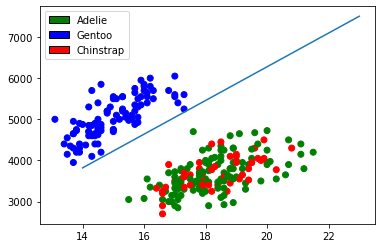

In [40]:
plt.scatter(X[:,0], X[:,1], color=penguinclean.Species.map(colors) )
plt.legend(handles=legend_elements)

plt.plot(x0div, x1div)

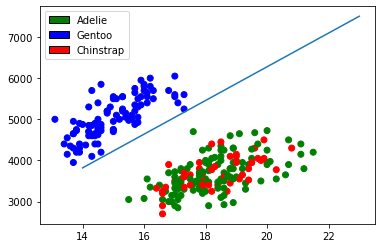

In [41]:
plt.scatter(penguins["Beak Depth (mm)"], penguins["Body Mass (g)"] , color = penguins.Species.map(colors)  )
plt.legend(handles=legend_elements)
plt.plot(x0div, x1div)

In [42]:
# "Shooting fish in a barrel."

# We took two features, performed linear regression, and 
# used the coefficients to build a linear classifier.

# Gentoo is easy to tell apart from the other two species of brush-tailed penguin.


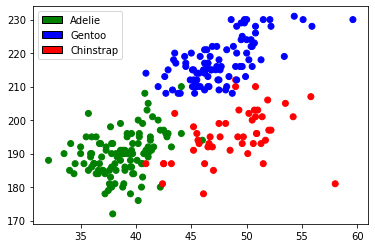

In [44]:
# Other dimensions will be informative about the difference between
# the red and the green birds:
plt.scatter(penguins["Beak Length (mm)"], penguins["Flipper Length (mm)"] , color = penguins.Species.map(colors)  )
plt.legend(handles=legend_elements)
# I can glance at this graph and guess at the locations of the
# lines that would separate each of the three species from the
# rest, but I will need a little more theory to do three-way classificaiton. 

In [45]:
# Now I'm going to go after a harder problem; Adelie penguins with all four X
reg4_1 = LinearRegression().fit(penguins_train[["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"]].values, penguins_train.SP1.values)

In [46]:
reg4_1.coef_, reg4_1.intercept_

(array([ 0.09363483,  0.00015068, -0.07056835, -0.00607872]),
 2.530635891191556)

In [47]:
print(["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"])
reg4_1.coef_, reg4_1.intercept_

['Beak Depth (mm)', 'Body Mass (g)', 'Beak Length (mm)', 'Flipper Length (mm)']


(array([ 0.09363483,  0.00015068, -0.07056835, -0.00607872]),
 2.530635891191556)

In [ ]:
# Can I interpret these coefficients?  I can interpret their signs, of course..
# Three of the measurements are in mm, one is in g, and they have different
# relevant scales.


In [54]:
penguins_train.std()

/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_49111/3726410447.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  penguins_train.std()


Unnamed: 0              99.919422
Beak Length (mm)         5.490057
Beak Depth (mm)          1.938712
Flipper Length (mm)     14.453772
Body Mass (g)          804.639050
SP1                      0.497528
SP2                      0.482982
SP3                      0.394179
SP1PREDICT               0.498389
SP1LINEAR                0.456162
dtype: float64

In [55]:
# Let's set put the standard deviations of each column of X into an array:
feature_std = np.array([1.964146, 826.402823,  5.046194,  13.464290 ])
# If I arranged the columns correctly, this product 
print(["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"])

reg4_1.coef_ * feature_std



['Beak Depth (mm)', 'Body Mass (g)', 'Beak Length (mm)', 'Flipper Length (mm)']


array([ 0.18391247,  0.12452019, -0.35610159, -0.08184567])

In [51]:
# tells us a little more about which fields had more weight.  
# Flipper length and Body mass aren't as weighted as two 
# beak measurements.

In [57]:
SP1PREDICT_train= np.dot( penguins_train[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values,reg4_1.coef_) + reg4_1.intercept_

In [58]:
penguins_train["SP1PREDICT"] = SP1PREDICT_train > 0.5
penguins_train["SP1LINEAR"] = SP1PREDICT_train 

/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_49111/916277973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_train["SP1PREDICT"] = SP1PREDICT_train > 0.5
/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_49111/916277973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_train["SP1LINEAR"] = SP1PREDICT_train


In [59]:
SP1PREDICT_test= np.dot( penguins_test[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values,reg4_1.coef_) + reg4_1.intercept_

In [60]:
penguins_test["SP1PREDICT"] = SP1PREDICT_test > 0.5
penguins_test["SP1LINEAR"] = SP1PREDICT_test 

In [61]:
penguins_train.groupby(["SP1PREDICT", "SP1"]).SP1PREDICT.count()

SP1PREDICT  SP1  
False       False    140
            True       1
True        False      3
            True     112
Name: SP1PREDICT, dtype: int64

In [ ]:
len(penguins_train)

In [ ]:
# On the training data, which is cheating,  
# Out of 256 penguins, the four-dimensional linear classifier got 252 right
# and 4 wrong on the "is-it-an-Adelie"

In [62]:
penguins_test.groupby(["SP1PREDICT", "SP1"]).SP1PREDICT.count()

SP1PREDICT  SP1  
False       False    27
            True     22
True        False    19
            True     18
Name: SP1PREDICT, dtype: int64

In [63]:
penguins_test.head()

,Unnamed: 0,Species,Island,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g),Sex,SP1,SP2,SP3,SP1PREDICT,SP1LINEAR
0,58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,FEMALE,False,True,False,True,0.838411
1,57,Adelie,Biscoe,40.6,18.8,193.0,3800.0,MALE,False,False,True,True,0.825276
2,252,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,FEMALE,True,False,False,False,0.208334
3,20,Adelie,Biscoe,37.8,18.3,174.0,3400.0,FEMALE,True,False,False,True,1.031275
4,299,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,MALE,False,True,False,False,0.417533


(array([ 1.,  0.,  0.,  1.,  1.,  2.,  0.,  1.,  1.,  1.,  5.,  7.,  3.,
         9., 14., 19., 11., 14., 14.,  9.,  6.,  5.,  5.,  5.,  0.,  2.,
         2.,  3.,  1.,  1.,  1.,  2.,  7., 10.,  7.,  6., 10.,  9.,  7.,
         8.,  5.,  7.,  7., 11.,  7.,  2.,  4.,  2.,  0.,  1.]),
 array([-5.69953749e-01, -5.31891890e-01, -4.93830031e-01, -4.55768172e-01,
        -4.17706313e-01, -3.79644454e-01, -3.41582595e-01, -3.03520736e-01,
        -2.65458877e-01, -2.27397018e-01, -1.89335159e-01, -1.51273300e-01,
        -1.13211441e-01, -7.51495823e-02, -3.70877233e-02,  9.74135632e-04,
         3.90359946e-02,  7.70978536e-02,  1.15159713e-01,  1.53221572e-01,
         1.91283430e-01,  2.29345289e-01,  2.67407148e-01,  3.05469007e-01,
         3.43530866e-01,  3.81592725e-01,  4.19654584e-01,  4.57716443e-01,
         4.95778302e-01,  5.33840161e-01,  5.71902020e-01,  6.09963879e-01,
         6.48025738e-01,  6.86087597e-01,  7.24149456e-01,  7.62211315e-01,
         8.00273174e-01,  8.3833

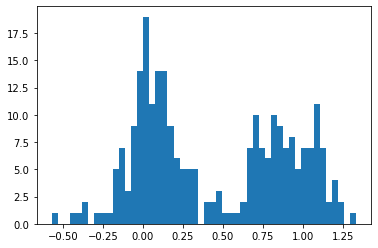

In [64]:
# Since the scores for a binary classifier are in one dimension, 
# I can histogram them

plt.hist(SP1PREDICT_train, bins=50)

(array([2., 1., 0., 3., 4., 3., 2., 3., 0., 5., 4., 3., 4., 3., 5., 1., 0.,
        2., 1., 1., 2., 0., 0., 0., 1., 1., 2., 1., 5., 1., 2., 3., 2., 2.,
        5., 3., 3., 2., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([-0.23570513, -0.20050984, -0.16531456, -0.13011927, -0.09492398,
        -0.05972869, -0.02453341,  0.01066188,  0.04585717,  0.08105246,
         0.11624775,  0.15144303,  0.18663832,  0.22183361,  0.2570289 ,
         0.29222419,  0.32741947,  0.36261476,  0.39781005,  0.43300534,
         0.46820062,  0.50339591,  0.5385912 ,  0.57378649,  0.60898178,
         0.64417706,  0.67937235,  0.71456764,  0.74976293,  0.78495821,
         0.8201535 ,  0.85534879,  0.89054408,  0.92573937,  0.96093465,
         0.99612994,  1.03132523,  1.06652052,  1.10171581,  1.13691109,
         1.17210638,  1.20730167,  1.24249696,  1.27769224,  1.31288753,
         1.34808282,  1.38327811,  1.4184734 ,  1.45366868,  1.48886397,
         1.52405926]),
 <BarContainer object

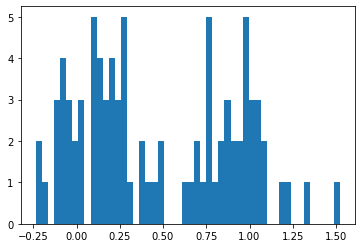

In [65]:
plt.hist(SP1PREDICT_test, bins=50)

(array([10., 13., 19.,  5.,  3., 10., 14.,  8.,  3.,  1.]),
 array([-0.23570513, -0.05972869,  0.11624775,  0.29222419,  0.46820062,
         0.64417706,  0.8201535 ,  0.99612994,  1.17210638,  1.34808282,
         1.52405926]),
 <BarContainer object of 10 artists>)

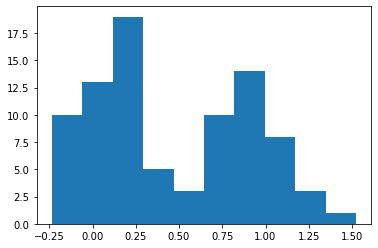

In [66]:
plt.hist(SP1PREDICT_test, bins=10)

In [68]:
# And they are nicely bimodal.
#  SP1PREDICT_train= np.dot( penguins_train[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values,reg2.coef_) + reg2.intercept_

def penguinspredict(x):
  #  SP1PREDICTION= np.dot( x[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values,reg4_1.coef_) + reg4_1.intercept_
    SP1PREDICTION= np.dot( x,reg4_1.coef_) + reg4_1.intercept_

    return(SP1PREDICTION > 0.5)


In [69]:
# TEST IT (that penguinspredict does something)
penguinspredict(penguins_train[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values)

array([False, False,  True,  True, False,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False, False,  True, False, False, False,  True, False, False,
        True, False,  True,  True, False,  True,  True, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
       False,  True, False, False, False,  True,  True,  True, False,
        True, False,  True,  True,  True, False,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
        True,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,

In [70]:
mean0 = penguins_train["Beak Depth (mm)"].mean()
mean1 = penguins_train["Body Mass (g)"].mean() 
mean2 = penguins_train['Beak Length (mm)'].mean()
mean3 = penguins_train["Flipper Length (mm)"].mean()


In [71]:
xgrid = np.arange(170, 230,2) # range for flipper length
ygrid = np.arange(30,59,1)  # range for beak length
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([mean0, mean1, ygrid[j], xgrid[i]])
       # print(x)
        z[i,j]= penguinspredict(x)


(30, 29) (30, 29) (30, 29)


Text(0, 0.5, 'Flipper Length (mm)')

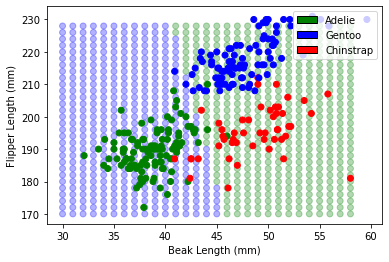

In [72]:
colorsnum = { 0 : "green", 1: "blue", 2: "red"}
c = [colorsnum[i] for i in z.reshape(-1)]
plt.scatter(yax,xax, color=c, alpha=0.3)

plt.scatter(penguins["Beak Length (mm)"], penguins["Flipper Length (mm)"] , color = penguins.Species.map(colors)  )
plt.legend(handles=legend_elements)
plt.xlabel("Beak Length (mm)")
plt.ylabel( "Flipper Length (mm)")

In [ ]:
# This is a contour-like plot of the boundary between "is-it-Adelie" and not Adelie.
# For the *one* dimensional classifier 